# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os
from pprint import pprint as pp
import scipy.stats as st
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Output File (CSV)
output_directory = 'output_data'
output_data_file = "cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | port macquarie
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | veraval
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | sakakah
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | catamarca
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | saint anthony
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | nouakchott
Processing Record 17 of Set 1 | asau
Processing Record 18 of Set 1 | vitimskiy
City not found. Skipping...
Processing Record 19 of Set 1 | huajuapan
City not found. Skipping...
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | isangel
Processing Record 22 of

Processing Record 36 of Set 4 | longlac
City not found. Skipping...
Processing Record 37 of Set 4 | flinders
Processing Record 38 of Set 4 | ribeira grande
Processing Record 39 of Set 4 | khor
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | okakarara
Processing Record 42 of Set 4 | la ronge
Processing Record 43 of Set 4 | sisimiut
Processing Record 44 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 4 | baykit
Processing Record 47 of Set 4 | sidi ali
Processing Record 48 of Set 4 | nicoya
Processing Record 49 of Set 4 | grand forks
Processing Record 0 of Set 5 | caravelas
Processing Record 1 of Set 5 | faya
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | cherskiy
Processing Record 4 of Set 5 | la peca
Processing Record 5 of Set 5 | yanam
Processing Record 6 of Set 5 | madang
Processing Record 7 of Set 5 | bethel
Processing Record 8 of Set 5 | bubaque

Processing Record 27 of Set 8 | samarai
Processing Record 28 of Set 8 | somerset
Processing Record 29 of Set 8 | chapayeve
Processing Record 30 of Set 8 | tabas
Processing Record 31 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 32 of Set 8 | marcona
City not found. Skipping...
Processing Record 33 of Set 8 | mount gambier
Processing Record 34 of Set 8 | shaunavon
Processing Record 35 of Set 8 | mabaruma
Processing Record 36 of Set 8 | shubarshi
Processing Record 37 of Set 8 | nago
Processing Record 38 of Set 8 | asfi
Processing Record 39 of Set 8 | ahipara
Processing Record 40 of Set 8 | maudaha
Processing Record 41 of Set 8 | chumikan
Processing Record 42 of Set 8 | kirakira
Processing Record 43 of Set 8 | sukhobuzimskoye
Processing Record 44 of Set 8 | sept-iles
Processing Record 45 of Set 8 | sheregesh
Processing Record 46 of Set 8 | lethem
Processing Record 47 of Set 8 | oranjemund
Processing Record 48 of Set 8 | kaeo
Processing Record 49 of Set 8 

Processing Record 14 of Set 12 | borogontsy
Processing Record 15 of Set 12 | mana
Processing Record 16 of Set 12 | opuwo
Processing Record 17 of Set 12 | luocheng
Processing Record 18 of Set 12 | shepsi
Processing Record 19 of Set 12 | mecca
Processing Record 20 of Set 12 | bombay
Processing Record 21 of Set 12 | ambon
Processing Record 22 of Set 12 | xai-xai
Processing Record 23 of Set 12 | monte cristi
City not found. Skipping...
Processing Record 24 of Set 12 | emborion
Processing Record 25 of Set 12 | rocha
Processing Record 26 of Set 12 | anaco
Processing Record 27 of Set 12 | brandfort
Processing Record 28 of Set 12 | toms river
Processing Record 29 of Set 12 | zhuanghe
Processing Record 30 of Set 12 | kiunga
Processing Record 31 of Set 12 | arlit
Processing Record 32 of Set 12 | vallenar
Processing Record 33 of Set 12 | brnakot
Processing Record 34 of Set 12 | kailua
Processing Record 35 of Set 12 | maltahohe
Processing Record 36 of Set 12 | biak
Processing Record 37 of Set 12 |

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,67.17,89,41,1.99,ZA,1680391098
1,port macquarie,-31.4333,152.9167,69.89,72,32,8.95,AU,1680391244
2,hilo,19.7297,-155.0900,85.28,74,40,9.22,US,1680391113
3,veraval,20.9000,70.3667,74.37,79,27,9.64,IN,1680391245
4,atuona,-9.8000,-139.0333,80.76,75,21,15.14,PF,1680391245


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data_file", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data_file", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,67.17,89,41,1.99,ZA,1680391098
1,port macquarie,-31.4333,152.9167,69.89,72,32,8.95,AU,1680391244
2,hilo,19.7297,-155.0900,85.28,74,40,9.22,US,1680391113
3,veraval,20.9000,70.3667,74.37,79,27,9.64,IN,1680391245
4,atuona,-9.8000,-139.0333,80.76,75,21,15.14,PF,1680391245


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

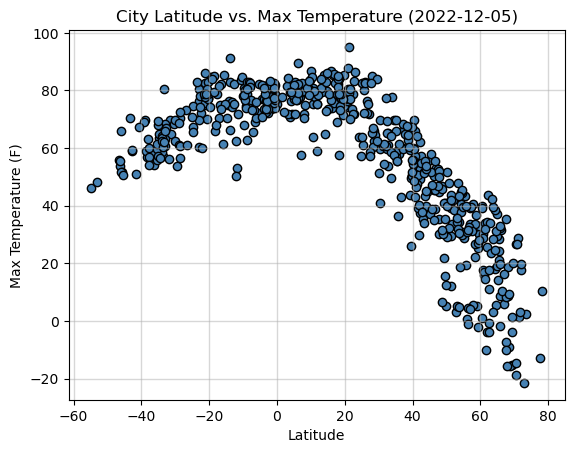

In [9]:
# Build scatter plot for latitude vs. temperature
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Max Temperature")

#### Latitude Vs. Humidity

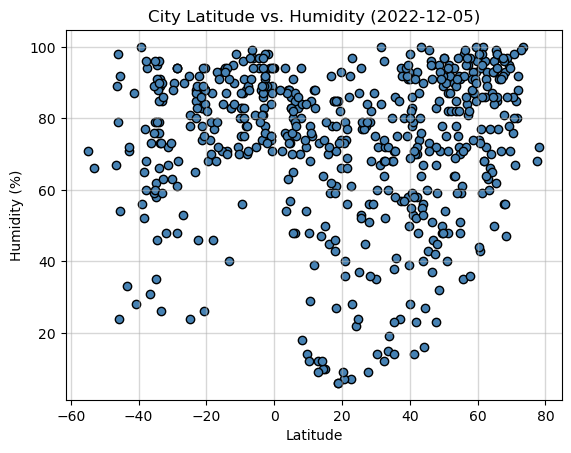

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Humidity")

#### Latitude Vs. Cloudiness

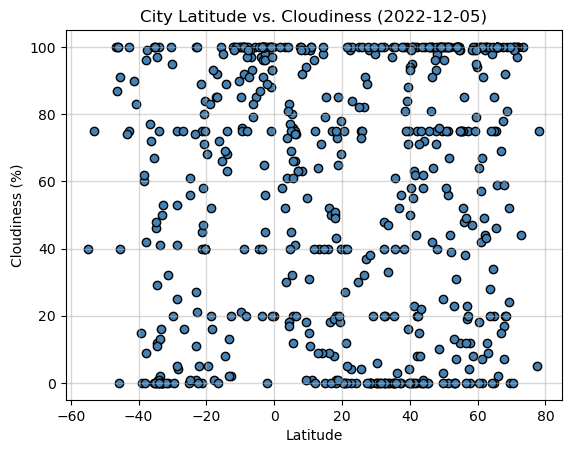

In [11]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Cloudiness")

#### Latitude vs. Wind Speed Plot

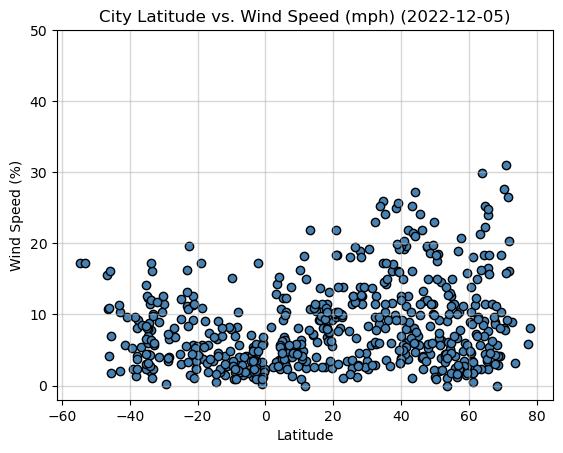

In [12]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph) (2022-12-05)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("City Latitude vs Wind Speed (mph)")

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hilo,19.7297,-155.0900,85.28,74,40,9.22,US,1680391113
3,veraval,20.9000,70.3667,74.37,79,27,9.64,IN,1680391245
5,sakakah,29.9697,40.2064,51.37,35,0,3.51,SA,1680391245
9,sitka,57.0531,-135.3300,39.09,81,75,10.36,US,1680391226
12,saint anthony,45.0205,-93.2180,37.18,60,0,6.91,US,1680391246


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,67.17,89,41,1.99,ZA,1680391098
1,port macquarie,-31.4333,152.9167,69.89,72,32,8.95,AU,1680391244
4,atuona,-9.8000,-139.0333,80.76,75,21,15.14,PF,1680391245
6,new norfolk,-42.7826,147.0587,58.91,71,100,1.99,AU,1680391245
7,hermanus,-34.4187,19.2345,62.80,88,1,8.77,ZA,1680391182


###  Temperature vs. Latitude Linear Regression Plot



The r-squared is : -0.89


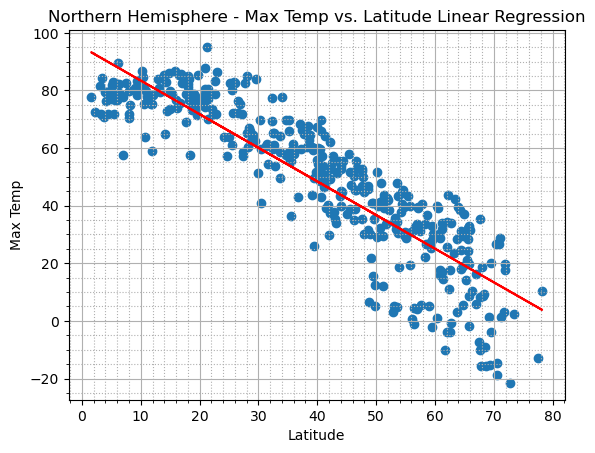

In [16]:
# Linear regression on Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Call an function #2
annotate(equation, 40, 310)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

#Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Max Temp vs Latitude Linear Regression")

In the northern hemisphere, there exists a robust inverse relationship between the maximum temperature and the latitude.

The r-squared is : 0.72


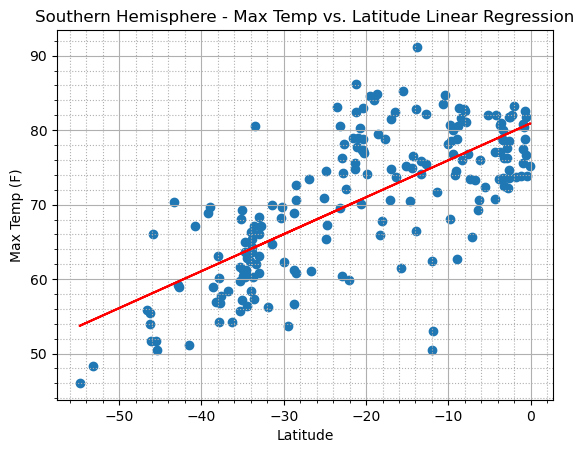

In [17]:
# Linear regression on Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Call an function #2
annotate(equation, -30, 275)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Max Temp vs Latitude Linear Regression")

A moderate direct correlation can be observed between the maximum temperature and the latitude in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is : 0.27


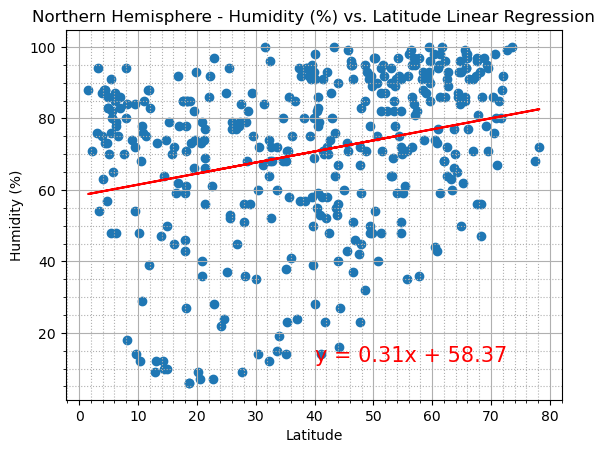

In [18]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Humidity (%) vs Latitude Linear Regression")

There is a weak positive correlation between latitude and humidity for the northern hemisphere.

The r-squared is : 0.35


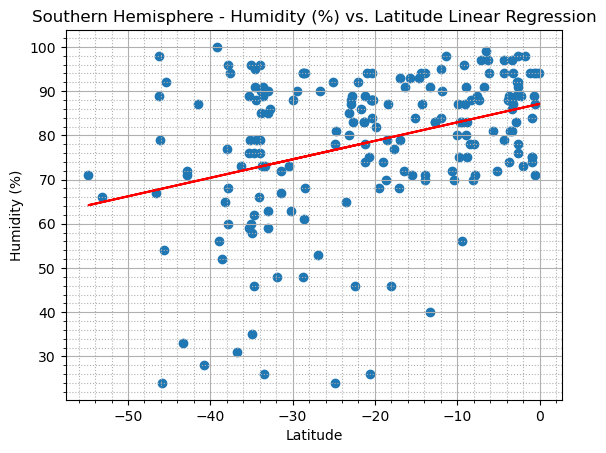

In [19]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Call an function #2
annotate(equation, 40, 12)

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid format
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Humidity (%) vs Latitude Linear Regression")

A slight direct relationship exists between the latitude and humidity in the northern hemisphere.



### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is : 0.12


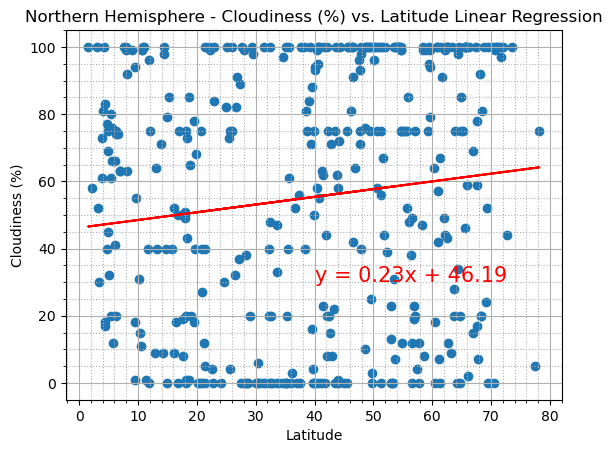

In [20]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Call an function #2
annotate(equation, 40, 30)
# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression")

In the northern hemisphere, a mild inverse correlation can be observed between the latitude and cloudiness.

The r-squared is : 0.35


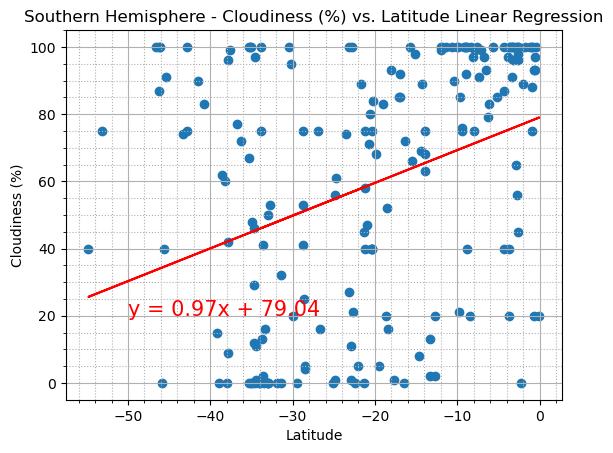

In [21]:
# Southern Hemisphere
# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Call an function #2
annotate(equation, -50, 20)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression")

A weak direct correlation can be observed between the latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is : 0.12


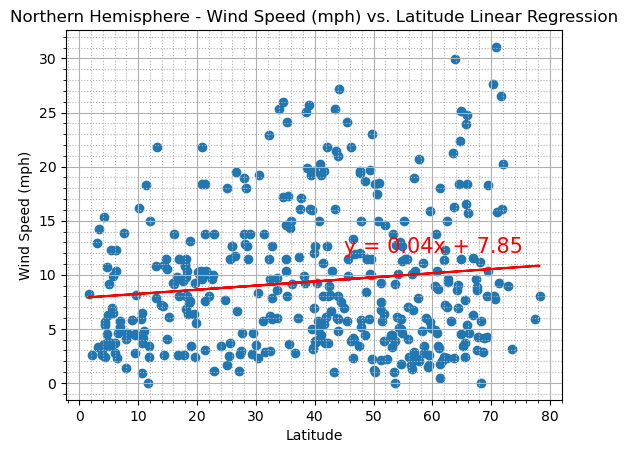

In [22]:
# Northern Hemisphere
# Call an function #1
equation = linear_agression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Call an function #2
annotate(equation, 45, 12)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Northern Hemisphere - Wind Speed vs Latitude Linear Regression")

A slight direct correlation exists between the latitude and windspeed in the northern hemisphere.

The r-squared is : -0.41


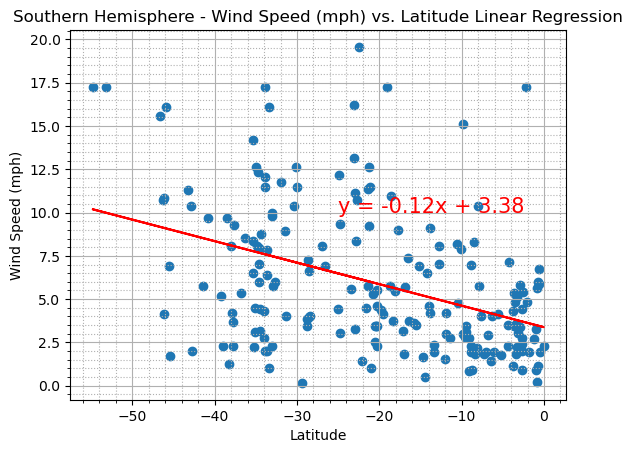

In [23]:
# Southern Hemisphere

# Call an function #1
equation = linear_agression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Call an function #2
annotate(equation, -25, 10)

# Set a title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set Grid
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')

# Save the figure
plt.savefig("Southern Hemisphere - Wind Speed vs Latitude Linear Regression")

In the southern hemisphere, a mild inverse correlation can be observed between the latitude and windspeed.

# Analysis

As we approach the equator (0 Deg. Latitude), the weather tends to get considerably warmer, and the southern hemisphere is usually warmer than the northern hemisphere during this time of the year, possibly due to the tilt of the earth. While there is no significant correlation between latitude and cloudiness, it is noteworthy that a cluster of cities experiences 0%, 80%, and 100% cloudiness at 0 latitude. Similarly, there is no pronounced correlation between latitude and wind speed, but several cities in the northern hemisphere report wind speeds over 20 mph